http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 


#### This version is the same as the public availble version for getting started with pandas, but with edits, comments, and some small addions for the Data-X course at Berkeley.  Edited, Ikhlaq Sidhu, Jan 2017

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line makes plots/graphs appear within the notebook
%matplotlib inline

Checking if list and tuple make any difference

In [8]:
nparray_list = np.array(['a', 'b', 'c'])
nparray_tuple = np.array(('a', 'b', 'c'))
np.array_equal(nparray_list, nparray_tuple)

True

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
# This is a series, its like an array but with an index
s = pd.Series([1,3,5,np.nan,6,8])

In [10]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [11]:
# We will look at the time series index separately, but its also in this notebook.
dates = pd.date_range('20130101', periods=6)

In [12]:
# dates is a time series object used as an index
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
numIndex = np.arange(1, 7)
numIndex

array([1, 2, 3, 4, 5, 6])

In [14]:
list('ABCD')

['A', 'B', 'C', 'D']

In [15]:
# The DataFrame below is from an np.array and column list
#df = pd.DataFrame(np.random.randn(6,4), index=numIndex, columns=list('ABCD'))
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [16]:
df

,A,B,C,D
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-05,0.599741,-0.096466,0.521904,0.397156
2013-01-06,-0.199565,0.094773,0.186266,-1.737809


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [17]:
np.array([3, 1])*4

array([12,  4])

In [18]:
# See below that all the columns can be different types, created from a dictionary.
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train"]*2),
                   'F':'foo'})

In [19]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [20]:
# type for each column
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [21]:
# df2.<TAB>
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [22]:
# as before, head(n) gives you the first n rows, defaults to 5
df.head()

,A,B,C,D
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-05,0.599741,-0.096466,0.521904,0.397156


In [23]:
df.tail(3)

,A,B,C,D
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-05,0.599741,-0.096466,0.521904,0.397156
2013-01-06,-0.199565,0.094773,0.186266,-1.737809


Display the index, columns, and the underlying numpy data

In [24]:
# if you want the index by itelf, use .index
df.index
df.index[2:4]

DatetimeIndex(['2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [25]:
# Here is a list of the columns
print(df.columns)
print(df.columns[2])
print(df.columns[2:4])

Index(['A', 'B', 'C', 'D'], dtype='object')
C
Index(['C', 'D'], dtype='object')


In [26]:
# df.values extracts only the data in np.array
df.values

array([[-0.25248481, -0.92788806, -0.34618233,  0.23757923],
       [-0.38939999,  0.25979503,  0.3428234 ,  1.92304669],
       [ 0.16360004,  0.99669784, -0.42032235, -2.22767511],
       [ 1.14051894, -0.29943171, -0.40972443,  0.1045899 ],
       [ 0.5997413 , -0.09646559,  0.52190409,  0.39715625],
       [-0.19956498,  0.09477341,  0.18626562, -1.7378088 ]])

Describe shows a quick statistic summary of your data

In [27]:
# A quick way to get statistics
print(df.describe())
# df.describe()['A'][1]
df.describe()[2:3]

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.177068  0.004580 -0.020873 -0.217185
std    0.592339  0.637134  0.421042  1.524646
min   -0.389400 -0.927888 -0.420322 -2.227675
25%   -0.239255 -0.248690 -0.393839 -1.277209
50%   -0.017982 -0.000846 -0.079958  0.171085
75%    0.490706  0.218540  0.303684  0.357262
max    1.140519  0.996698  0.521904  1.923047


,A,B,C,D
std,0.592339,0.637134,0.421042,1.524646


Transposing your data

In [28]:
# yes, this is the pandas method
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.252485,-0.389400,0.163600,1.140519,0.599741,-0.199565
B,-0.927888,0.259795,0.996698,-0.299432,-0.096466,0.094773
C,-0.346182,0.342823,-0.420322,-0.409724,0.521904,0.186266
D,0.237579,1.923047,-2.227675,0.104590,0.397156,-1.737809


Sorting by an axis

In [41]:
# recall df
df

,A,B,C,D
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-05,0.599741,-0.096466,0.521904,0.397156
2013-01-06,-0.199565,0.094773,0.186266,-1.737809


In [42]:
# See that its using the header to sort
#df.sort_index(axis=0, ascending=False)
df.sort_index(axis=1, ascending=False)

# try df[2:3].sort_index(axis=1, ascending=False)
df[2:3].sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-03,-2.227675,-0.420322,0.996698,0.1636


Sorting by value

In [43]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-06,-0.199565,0.094773,0.186266,-1.737809
2013-01-05,0.599741,-0.096466,0.521904,0.397156
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [44]:
df['A']

2013-01-01   -0.252485
2013-01-02   -0.389400
2013-01-03    0.163600
2013-01-04    1.140519
2013-01-05    0.599741
2013-01-06   -0.199565
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [45]:
# A slice: by rows (row numbers)
df[1:3]

,A,B,C,D
2013-01-02,-0.3894,0.259795,0.342823,1.923047
2013-01-03,0.1636,0.996698,-0.420322,-2.227675


In [46]:
# A slice: by rows (by range of values in index)
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-04,1.140519,-0.299432,-0.409724,0.104590


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [47]:
# Introduce loc: this will get you a cross section of the table by label ran
# df.loc[a:b, x:y], by rows and column location

print(df)
df.loc['20130102':'20130104','B':'D']
#df.loc[dates[0]]

# df[0:1]
# df[a:b] by rows
# df[[col]] or df[[list of col]] by columns
# df.loc[a:b, x:y], by rows and column location
# df.iloc[3:5,0:2]#, by slicing by specific position

                   A         B         C         D
2013-01-01 -0.252485 -0.927888 -0.346182  0.237579
2013-01-02 -0.389400  0.259795  0.342823  1.923047
2013-01-03  0.163600  0.996698 -0.420322 -2.227675
2013-01-04  1.140519 -0.299432 -0.409724  0.104590
2013-01-05  0.599741 -0.096466  0.521904  0.397156
2013-01-06 -0.199565  0.094773  0.186266 -1.737809


,B,C,D
2013-01-02,0.259795,0.342823,1.923047
2013-01-03,0.996698,-0.420322,-2.227675
2013-01-04,-0.299432,-0.409724,0.104590


Selection by Label

In [49]:
#In this case, the columns are in a list
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.252485,-0.927888
2013-01-02,-0.389400,0.259795
2013-01-03,0.163600,0.996698
2013-01-04,1.140519,-0.299432
2013-01-05,0.599741,-0.096466
2013-01-06,-0.199565,0.094773


Showing label slicing, both endpoints are included

In [55]:
# more slicing with loc
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.389400,0.259795
2013-01-03,0.163600,0.996698
2013-01-04,1.140519,-0.299432


Reduction in the dimensions of the returned object

In [56]:

df.loc['20130102',['A','B']]

A   -0.389400
B    0.259795
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [60]:
# or get just one value
df.loc[dates[0],'A']

-0.25248480504262161

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [61]:
# recall df
df

,A,B,C,D
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579
2013-01-02,-0.389400,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,-0.420322,-2.227675
2013-01-04,1.140519,-0.299432,-0.409724,0.104590
2013-01-05,0.599741,-0.096466,0.521904,0.397156
2013-01-06,-0.199565,0.094773,0.186266,-1.737809


In [62]:
# Introduce iloc: its like loc, but uses index position instead
df.iloc[3]

A    1.140519
B   -0.299432
C   -0.409724
D    0.104590
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [63]:
# Get a cross section by index positions
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.140519,-0.299432
2013-01-05,0.599741,-0.096466


In [66]:
print(np.arange(3,5))

[3 4]


By lists of integer position locations, similar to the numpy/python style

In [67]:
# iloc will accept lists of position numbers
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.389400,0.342823
2013-01-03,0.163600,-0.420322
2013-01-05,0.599741,0.521904


For slicing rows explicitly

In [68]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.3894,0.259795,0.342823,1.923047
2013-01-03,0.1636,0.996698,-0.420322,-2.227675


For slicing columns explicitly

In [69]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.927888,-0.346182
2013-01-02,0.259795,0.342823
2013-01-03,0.996698,-0.420322
2013-01-04,-0.299432,-0.409724
2013-01-05,-0.096466,0.521904
2013-01-06,0.094773,0.186266


For getting a value explicitly

In [70]:
df.iloc[1,1]

0.25979502938995064

For getting fast access to a scalar (equiv to the prior method)

In [71]:
# same as above but faster for one single scaler value
df.iat[1,1]

0.25979502938995064

## Boolean Indexing

Using a single column’s values to select data.

In [76]:
print (df)

# this will be only the rows where the A column is > 0
print (df.A > 0)
print (df[df.A > 0])

# same result
print (df['A'] > 0)
print (df[df['A'] > 0])

                   A         B         C         D
2013-01-01 -0.252485 -0.927888 -0.346182  0.237579
2013-01-02 -0.389400  0.259795  0.342823  1.923047
2013-01-03  0.163600  0.996698 -0.420322 -2.227675
2013-01-04  1.140519 -0.299432 -0.409724  0.104590
2013-01-05  0.599741 -0.096466  0.521904  0.397156
2013-01-06 -0.199565  0.094773  0.186266 -1.737809
2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: A, dtype: bool
                   A         B         C         D
2013-01-03  0.163600  0.996698 -0.420322 -2.227675
2013-01-04  1.140519 -0.299432 -0.409724  0.104590
2013-01-05  0.599741 -0.096466  0.521904  0.397156
2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: A, dtype: bool
                   A         B         C         D
2013-01-03  0.163600  0.996698 -0.420322 -2.227675
2013-01-04  1.140519 -0.299432 -0.409

A where operation for getting.

In [77]:
# Try this to see which elements are > 0
print (df > 0)
# The show only those values
df[df > 0]

                A      B      C      D
2013-01-01  False  False  False   True
2013-01-02  False   True   True   True
2013-01-03   True   True  False  False
2013-01-04   True  False  False   True
2013-01-05   True  False   True   True
2013-01-06  False   True   True  False


,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.237579
2013-01-02,NaN,0.259795,0.342823,1.923047
2013-01-03,0.163600,0.996698,NaN,NaN
2013-01-04,1.140519,NaN,NaN,0.104590
2013-01-05,0.599741,NaN,0.521904,0.397156
2013-01-06,NaN,0.094773,0.186266,NaN


Using the isin() method for filtering:

In [78]:
df2 = df.copy()

In [80]:
# We are about to add a new column to df2
df2['E'] = ['one','one', 'two','three','four','three']

In [81]:
df2

,A,B,C,D,E
2013-01-01,-0.252485,-0.927888,-0.346182,0.237579,one
2013-01-02,-0.389400,0.259795,0.342823,1.923047,one
2013-01-03,0.163600,0.996698,-0.420322,-2.227675,two
2013-01-04,1.140519,-0.299432,-0.409724,0.104590,three
2013-01-05,0.599741,-0.096466,0.521904,0.397156,four
2013-01-06,-0.199565,0.094773,0.186266,-1.737809,three


In [84]:
# We use isin to get only the rows that have 'two' and 'four'
print (df2['E'].isin(['two','four']))

df2[df2['E'].isin(['two','four'])]

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2013-01-03,0.163600,0.996698,-0.420322,-2.227675,two
2013-01-05,0.599741,-0.096466,0.521904,0.397156,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [85]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [86]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [91]:
# Many of the same indexing and slicing methods can be used also to set data
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.000000,-0.927888,-0.346182,0.237579,NaN
2013-01-02,-0.389400,0.259795,0.342823,1.923047,1.0
2013-01-03,0.163600,0.996698,-0.420322,-2.227675,2.0
2013-01-04,1.140519,-0.299432,-0.409724,0.104590,3.0
2013-01-05,0.599741,-0.096466,0.521904,0.397156,4.0
2013-01-06,-0.199565,0.094773,0.186266,-1.737809,5.0


Setting values by label

In [92]:
# look at the first row and column
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.927888,-0.346182,0.237579,NaN
2013-01-02,-0.389400,0.259795,0.342823,1.923047,1.0
2013-01-03,0.163600,0.996698,-0.420322,-2.227675,2.0
2013-01-04,1.140519,-0.299432,-0.409724,0.104590,3.0
2013-01-05,0.599741,-0.096466,0.521904,0.397156,4.0
2013-01-06,-0.199565,0.094773,0.186266,-1.737809,5.0


Setting values by position

In [93]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.346182,0.237579,NaN
2013-01-02,-0.389400,0.259795,0.342823,1.923047,1.0
2013-01-03,0.163600,0.996698,-0.420322,-2.227675,2.0
2013-01-04,1.140519,-0.299432,-0.409724,0.104590,3.0
2013-01-05,0.599741,-0.096466,0.521904,0.397156,4.0
2013-01-06,-0.199565,0.094773,0.186266,-1.737809,5.0


Setting by assigning with a numpy array

In [94]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [97]:
df.loc[:,'D'] = np.array([5] * len(df))
print(df.shape)
print(len(df))

(6, 5)
6


The result of the prior setting operations

In [108]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.346182,5,NaN
2013-01-02,-0.389400,0.259795,0.342823,5,1.0
2013-01-03,0.163600,0.996698,-0.420322,5,2.0
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0
2013-01-05,0.599741,-0.096466,0.521904,5,4.0
2013-01-06,-0.199565,0.094773,0.186266,5,5.0


A where operation with setting.

In [109]:
# making a copy
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.346182,5,NaN
2013-01-02,-0.389400,0.259795,0.342823,5,1.0
2013-01-03,0.163600,0.996698,-0.420322,5,2.0
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0
2013-01-05,0.599741,-0.096466,0.521904,5,4.0
2013-01-06,-0.199565,0.094773,0.186266,5,5.0


In [110]:
# change the sign of values where df<0
df2[df2 < 0] = -df2

In [112]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.346182,5,NaN
2013-01-02,0.389400,0.259795,0.342823,5,1.0
2013-01-03,0.163600,0.996698,0.420322,5,2.0
2013-01-04,1.140519,0.299432,0.409724,5,3.0
2013-01-05,0.599741,0.096466,0.521904,5,4.0
2013-01-06,0.199565,0.094773,0.186266,5,5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [113]:
list(df.columns) + ['E']

['A', 'B', 'C', 'D', 'F', 'E']

In [118]:
df.reindex(columns=['A', 'B', 'D', 'F'])

,A,B,D,F
2013-01-01,0.000000,0.000000,5,NaN
2013-01-02,-0.389400,0.259795,5,1.0
2013-01-03,0.163600,0.996698,5,2.0
2013-01-04,1.140519,-0.299432,5,3.0
2013-01-05,0.599741,-0.096466,5,4.0
2013-01-06,-0.199565,0.094773,5,5.0


In [120]:
# df1 will have a new index and a new column E
print(df)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.346182  5  NaN
2013-01-02 -0.389400  0.259795  0.342823  5  1.0
2013-01-03  0.163600  0.996698 -0.420322  5  2.0
2013-01-04  1.140519 -0.299432 -0.409724  5  3.0
2013-01-05  0.599741 -0.096466  0.521904  5  4.0
2013-01-06 -0.199565  0.094773  0.186266  5  5.0


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.346182,5,NaN,NaN
2013-01-02,-0.389400,0.259795,0.342823,5,1.0,NaN
2013-01-03,0.163600,0.996698,-0.420322,5,2.0,NaN
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0,NaN


In [123]:
# Set E in the first 2 rows
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.346182,5,NaN,1.0
2013-01-02,-0.389400,0.259795,0.342823,5,1.0,1.0
2013-01-03,0.163600,0.996698,-0.420322,5,2.0,NaN
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0,NaN


To drop any rows that have missing data.

In [124]:
# A view where we drop any rows with value NaN
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.3894,0.259795,0.342823,5,1.0,1.0


Filling missing data

In [125]:
# fill NaN values with 5
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.346182,5,5.0,1.0
2013-01-02,-0.389400,0.259795,0.342823,5,1.0,1.0
2013-01-03,0.163600,0.996698,-0.420322,5,2.0,5.0
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0,5.0


To get the boolean mask where values are nan

In [127]:
# returns a boolean mask for null entries
print(df1)
pd.isnull(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.346182  5  NaN  1.0
2013-01-02 -0.389400  0.259795  0.342823  5  1.0  1.0
2013-01-03  0.163600  0.996698 -0.420322  5  2.0  NaN
2013-01-04  1.140519 -0.299432 -0.409724  5  3.0  NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [129]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.346182,5,NaN
2013-01-02,-0.389400,0.259795,0.342823,5,1.0
2013-01-03,0.163600,0.996698,-0.420322,5,2.0
2013-01-04,1.140519,-0.299432,-0.409724,5,3.0
2013-01-05,0.599741,-0.096466,0.521904,5,4.0
2013-01-06,-0.199565,0.094773,0.186266,5,5.0


In [152]:
df.mean()
# df.mean(0)
# df.mean(axis=0)

A    0.219149
B    0.159228
C   -0.020873
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [153]:
df.mean(1)
#df.mean(axis = 1)

2013-01-01    1.163454
2013-01-02    1.242644
2013-01-03    1.547995
2013-01-04    1.686273
2013-01-05    2.005036
2013-01-06    2.016295
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [154]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [173]:
pd.Series([1,3,5,np.nan,6,8], index=dates).shift(-1)

2013-01-01    3.0
2013-01-02    5.0
2013-01-03    NaN
2013-01-04    6.0
2013-01-05    8.0
2013-01-06    NaN
Freq: D, dtype: float64

In [174]:
pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [175]:
# This Series has 2 rows shifted down with NaN inserted into the first positions
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [176]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [177]:
dfXYZ = df.copy()
dfXYZ['Z']=s

In [178]:
df.sub?

In [179]:
print (dfXYZ)
df.sub(s, axis='index')

                   A         B         C  D    F    Z
2013-01-01  0.000000  0.000000 -0.346182  5  NaN  NaN
2013-01-02 -0.389400  0.259795  0.342823  5  1.0  NaN
2013-01-03  0.163600  0.996698 -0.420322  5  2.0  1.0
2013-01-04  1.140519 -0.299432 -0.409724  5  3.0  3.0
2013-01-05  0.599741 -0.096466  0.521904  5  4.0  5.0
2013-01-06 -0.199565  0.094773  0.186266  5  5.0  NaN


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.836400,-0.003302,-1.420322,4.0,1.0
2013-01-04,-1.859481,-3.299432,-3.409724,2.0,0.0
2013-01-05,-4.400259,-5.096466,-4.478096,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [190]:
# apply below will operate on every column
print(df)
df.apply(np.cumsum)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.346182  5  NaN
2013-01-02 -0.389400  0.259795  0.342823  5  1.0
2013-01-03  0.163600  0.996698 -0.420322  5  2.0
2013-01-04  1.140519 -0.299432 -0.409724  5  3.0
2013-01-05  0.599741 -0.096466  0.521904  5  4.0
2013-01-06 -0.199565  0.094773  0.186266  5  5.0


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.346182,5,NaN
2013-01-02,-0.389400,0.259795,-0.003359,10,1.0
2013-01-03,-0.225800,1.256493,-0.423681,15,3.0
2013-01-04,0.914719,0.957061,-0.833406,20,6.0
2013-01-05,1.514460,0.860596,-0.311502,25,10.0
2013-01-06,1.314895,0.955369,-0.125236,30,15.0


In [191]:
print(df)
df.apply(lambda x: x.max() - x.min())

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.346182  5  NaN
2013-01-02 -0.389400  0.259795  0.342823  5  1.0
2013-01-03  0.163600  0.996698 -0.420322  5  2.0
2013-01-04  1.140519 -0.299432 -0.409724  5  3.0
2013-01-05  0.599741 -0.096466  0.521904  5  4.0
2013-01-06 -0.199565  0.094773  0.186266  5  5.0


A    1.529919
B    1.296130
C    0.942226
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [192]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [193]:
s

0    2
1    4
2    3
3    2
4    5
5    2
6    1
7    0
8    6
9    2
dtype: int64

In [194]:
s.value_counts()

2    4
6    1
5    1
4    1
3    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [199]:
value_list = ['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat']
s = pd.Series(value_list, index=np.arange(1,len(value_list)+1))

In [200]:
s.str.lower()

1       a
2       b
3       c
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [201]:
df = pd.DataFrame(np.random.randn(10, 4))

In [202]:
df

,0,1,2,3
0,1.084527,-0.225094,-0.735213,1.093985
1,-1.081756,-0.544009,-0.180812,1.095656
2,2.355807,0.043322,-1.328420,1.129392
3,0.791085,1.204120,1.268860,0.014662
4,-1.197691,-1.577128,2.610736,0.157630
5,1.131938,0.629186,1.447844,1.236478
6,2.730241,0.860504,-2.047295,-0.930740
7,-0.630774,-0.069471,-2.101793,0.852363
8,0.004707,-0.572665,-0.966446,0.370155
9,-0.141482,-0.226211,-1.076186,0.967563


In [211]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [212]:
pd.concat(pieces)

,0,1,2,3
0,1.084527,-0.225094,-0.735213,1.093985
1,-1.081756,-0.544009,-0.180812,1.095656
2,2.355807,0.043322,-1.328420,1.129392
3,0.791085,1.204120,1.268860,0.014662
4,-1.197691,-1.577128,2.610736,0.157630
5,1.131938,0.629186,1.447844,1.236478
6,2.730241,0.860504,-2.047295,-0.930740
7,-0.630774,-0.069471,-2.101793,0.852363
8,0.004707,-0.572665,-0.966446,0.370155
9,-0.141482,-0.226211,-1.076186,0.967563


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [246]:
left = pd.DataFrame({'key': ['abc', 'def'], 'lval': [1, 2]})

In [247]:
right = pd.DataFrame({'key': ['abc', 'def', 'defg'], 'rval': [4, 5, 6]})

In [248]:
left

,key,lval
0,abc,1
1,def,2


In [249]:
right

,key,rval
0,abc,4
1,def,5
2,defg,6


In [250]:
pd.merge(left, right)

,key,lval,rval
0,abc,1,4
1,def,2,5


In [236]:
pd.merge?

### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [251]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [252]:
df

,A,B,C,D
0,0.274973,-0.356575,-0.689627,1.457216
1,0.335726,0.585837,-1.363048,-1.478276
2,0.801746,-0.590518,-0.416865,-0.132685
3,-0.895418,-0.332059,-1.349219,-0.644647
4,-0.268046,-0.097567,1.289063,-0.137780
5,1.167777,-1.824263,0.193022,-0.826461
6,-0.316232,1.666550,0.951594,-1.392405
7,-1.480895,-0.066757,0.587018,-0.881471


In [256]:
s = df.iloc[3:5]
s

,A,B,C,D
3,-0.895418,-0.332059,-1.349219,-0.644647
4,-0.268046,-0.097567,1.289063,-0.137780


In [257]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.274973,-0.356575,-0.689627,1.457216
1,0.335726,0.585837,-1.363048,-1.478276
2,0.801746,-0.590518,-0.416865,-0.132685
3,-0.895418,-0.332059,-1.349219,-0.644647
4,-0.268046,-0.097567,1.289063,-0.137780
5,1.167777,-1.824263,0.193022,-0.826461
6,-0.316232,1.666550,0.951594,-1.392405
7,-1.480895,-0.066757,0.587018,-0.881471
8,-0.895418,-0.332059,-1.349219,-0.644647
9,-0.268046,-0.097567,1.289063,-0.137780


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [258]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [259]:
df

,A,B,C,D
0,foo,one,-2.220306,0.015152
1,bar,one,-0.926235,-0.317957
2,foo,two,-0.569205,0.957105
3,bar,three,0.645218,0.179066
4,foo,two,-0.969597,1.445869
5,bar,two,-0.242410,-1.017148
6,foo,one,0.540337,0.728434
7,foo,three,0.658329,0.238693


Grouping and then applying a function sum to the resulting groups.

In [268]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.523427,-1.156040
foo,-2.560442,3.385252


In [269]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [270]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.926235 -0.317957
    three  0.645218  0.179066
    two   -0.242410 -1.017148
foo one   -1.679970  0.743586
    three  0.658329  0.238693
    two   -1.538802  2.402973

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [271]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [272]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [274]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.067663 -1.037876
      two    -1.123610 -0.134546
baz   one     1.062126 -0.292878
      two    -0.076037  1.925983
foo   one    -0.607389 -0.607935
      two    -1.153877  0.290956
qux   one     1.053423  1.081768
      two    -0.052636  0.545493

In [275]:
df2 = df[:4]

In [276]:
df2

A         B
first second                    
bar   one     1.067663 -1.037876
      two    -1.123610 -0.134546
baz   one     1.062126 -0.292878
      two    -0.076037  1.925983

The stack() method “compresses” a level in the DataFrame’s columns.

In [277]:
stacked = df2.stack()

In [278]:
stacked

first  second   
bar    one     A    1.067663
               B   -1.037876
       two     A   -1.123610
               B   -0.134546
baz    one     A    1.062126
               B   -0.292878
       two     A   -0.076037
               B    1.925983
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [279]:
stacked.unstack()

A         B
first second                    
bar   one     1.067663 -1.037876
      two    -1.123610 -0.134546
baz   one     1.062126 -0.292878
      two    -0.076037  1.925983

In [280]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.067663 -1.123610
      B -1.037876 -0.134546
baz   A  1.062126 -0.076037
      B -0.292878  1.925983

In [281]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.067663  1.062126
       B -1.037876 -0.292878
two    A -1.123610 -0.076037
       B -0.134546  1.925983

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [282]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [283]:
df

,A,B,C,D,E
0,one,A,foo,1.388463,1.623254
1,one,B,foo,-0.091835,0.935034
2,two,C,foo,-0.074150,-0.432416
3,three,A,bar,0.055503,0.310416
4,one,B,bar,0.519849,1.220349
5,one,C,bar,-0.425747,0.845518
6,two,A,foo,1.182615,-0.830312
7,three,B,foo,-1.235426,1.280462
8,one,C,foo,-0.903923,1.427161
9,one,A,bar,1.246650,-0.098696


We can produce pivot tables from this data very easily:

In [284]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.246650  1.388463
      B  0.519849 -0.091835
      C -0.425747 -0.903923
three A  0.055503       NaN
      B       NaN -1.235426
      C -0.768705       NaN
two   A       NaN  1.182615
      B -0.061253       NaN
      C       NaN -0.074150

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [306]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
#rng

In [307]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
#ts

In [308]:
ts.resample('1Min').mean()

2012-01-01 00:00:00    233.083333
2012-01-01 00:01:00    230.350000
Freq: T, dtype: float64

In [309]:
ts.resample?

Time zone representation

In [315]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [324]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [325]:
ts

2012-03-06   -0.974920
2012-03-07   -0.819698
2012-03-08    0.391728
2012-03-09    0.546589
2012-03-10    1.575242
Freq: D, dtype: float64

In [326]:
ts_utc = ts.tz_localize('UTC')

In [327]:
ts_utc

2012-03-06 00:00:00+00:00   -0.974920
2012-03-07 00:00:00+00:00   -0.819698
2012-03-08 00:00:00+00:00    0.391728
2012-03-09 00:00:00+00:00    0.546589
2012-03-10 00:00:00+00:00    1.575242
Freq: D, dtype: float64


Convert to another time zone

In [328]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.974920
2012-03-06 19:00:00-05:00   -0.819698
2012-03-07 19:00:00-05:00    0.391728
2012-03-08 19:00:00-05:00    0.546589
2012-03-09 19:00:00-05:00    1.575242
Freq: D, dtype: float64


Converting between time span representations

In [329]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [330]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [331]:
ts

2012-01-31   -1.333626
2012-02-29    0.693950
2012-03-31   -0.162312
2012-04-30    0.023606
2012-05-31    0.253592
Freq: M, dtype: float64

In [332]:
ps = ts.to_period()

In [333]:
ps

2012-01   -1.333626
2012-02    0.693950
2012-03   -0.162312
2012-04    0.023606
2012-05    0.253592
Freq: M, dtype: float64

In [334]:
ps.to_timestamp()

2012-01-01   -1.333626
2012-02-01    0.693950
2012-03-01   -0.162312
2012-04-01    0.023606
2012-05-01    0.253592
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [346]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [347]:
ts = pd.Series(np.random.randn(len(prng)), prng)
# ts

In [348]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [349]:
ts.head()

1990-03-01 09:00   -0.457968
1990-06-01 09:00    0.635672
1990-09-01 09:00   -0.731526
1990-12-01 09:00    0.696493
1991-03-01 09:00   -0.766433
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [354]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [355]:
df["grade"] = df["raw_grade"].astype("category")

In [356]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [357]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [358]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [359]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [360]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [361]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [373]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [374]:
for i in df.groupby("grade").size(): print(i)

1
0
0
2
3


## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [378]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [379]:
ts = ts.cumsum()

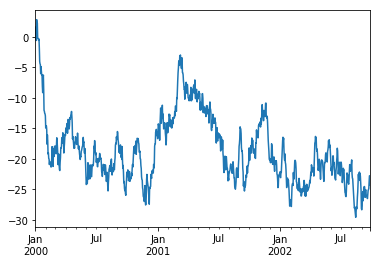

In [380]:
# plot a series almost automatically
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [389]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [390]:
df = df.cumsum()

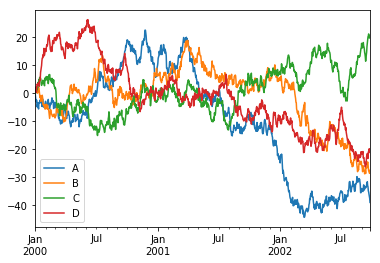

In [392]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [393]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [394]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.126736,0.799372,-0.011475,1.325192
1,2000-01-02,-1.451447,1.440395,-0.169614,0.875943
2,2000-01-03,-2.814332,1.668596,0.970254,2.147053
3,2000-01-04,-3.139782,0.278500,0.423568,0.184472
4,2000-01-05,-2.534243,0.910342,0.612595,1.230248
5,2000-01-06,-3.094700,0.260461,1.470833,2.439447
6,2000-01-07,-5.002778,1.296582,1.379316,3.162101
7,2000-01-08,-3.980086,-0.063578,1.988410,2.817882
8,2000-01-09,-3.442559,1.054498,2.039396,3.219247
9,2000-01-10,-4.881044,1.206922,3.859537,3.036616


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [397]:
!pip install PyTables

  Could not find a version that satisfies the requirement PyTables (from versions: )
No matching distribution found for PyTables


In [398]:
# df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [399]:
# pd.read_hdf('foo.h5','df')

### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [401]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [402]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.

In [403]:
dtypes = ['int64', 'float64', 'datetime64[ns]', 'timedelta64[ns]', 'complex128', 'object', 'bool']
n=5000

In [418]:
data = dict([ (t, np.random.randint(100, size=n).astype(t)) for t in dtypes])

In [419]:
df = pd.DataFrame(data)

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
bool               5000 non-null bool
complex128         5000 non-null complex128
datetime64[ns]     5000 non-null datetime64[ns]
float64            5000 non-null float64
int64              5000 non-null int64
object             5000 non-null object
timedelta64[ns]    5000 non-null timedelta64[ns]
dtypes: bool(1), complex128(1), datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 278.4+ KB


In [431]:
df.iat[1,1]=np.nan

In [435]:
df.isnull().sum()

bool               0
complex128         1
datetime64[ns]     0
float64            0
int64              0
object             0
timedelta64[ns]    0
dtype: int64